In [1]:
import pandas as pd
import numpy as np
import dropbox
import os

from scipy.stats import norm
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
# import altair as alt
# alt.renderers.enable('notebook')

C:\Users\saura\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# class Point():
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

#     def __repr__(self):
#         return 'Point({0},{1})'.format(self.x,self.y)

#     def translate(self, dx, dy):
#         "Add dx and dy to the point."
#         self.x += dx
#         self.y += dy

# e = Point(1.5, 2.5)

In [2]:
tier1_df_M = pd.read_csv("../data/Updated_scores_tier_1_comp_data_men.csv")
tier2_df_M = pd.read_csv("../data/Updated_scores_tier_2_comp_data_men.csv")
tier3_df_M = pd.read_csv("../data/Updated_scores_tier_3_comp_data_men.csv")

tier1_df_W = pd.read_csv("../data/Updated_scores_tier_1_comp_data_women.csv")
tier2_df_W = pd.read_csv("../data/Updated_scores_tier_2_comp_data_women.csv")
tier3_df_W = pd.read_csv("../data/Updated_scores_tier_3_comp_data_women.csv")

In [3]:
tier1_df_M.columns

Index(['Athlete_Comp_ID', 'Score_Metric', 'Finish_Rank', 'Gender',
       'Judge_1_Score', 'Judge_2_Score', 'Judge_3_Score', 'Judge_4_Score',
       'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Round_Group',
       'Season', 'Season_Comp', 'Round', 'Wind', 'Athlete_name'],
      dtype='object')

### Data Modelling starts..

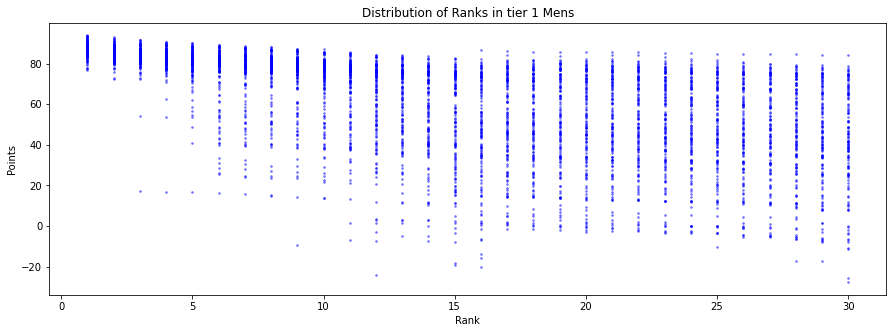

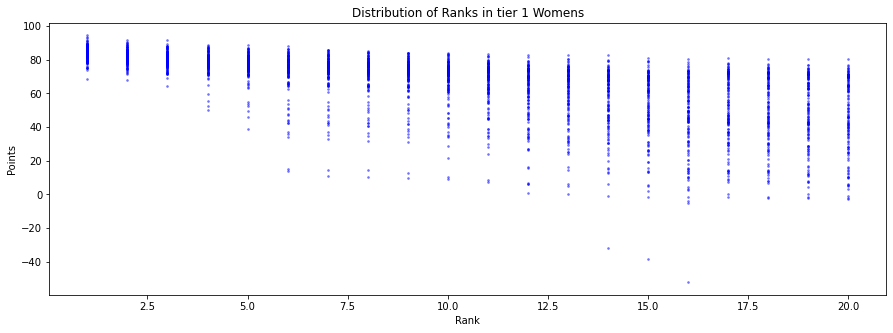

In [5]:
plt.figure(figsize = (15,5))
plt.scatter(tier1_df_M['Finish_Rank'], tier1_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier1_df_W['Finish_Rank'], tier1_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Womens")
plt.show()

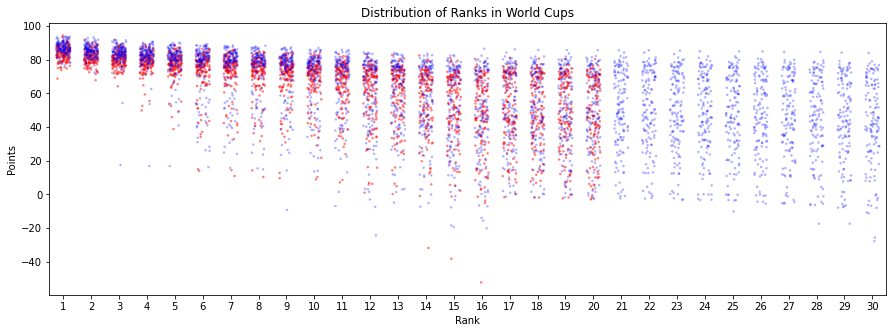

In [26]:
plt.figure(figsize = (15,5))
sns.stripplot(x="Finish_Rank", y="Score_Metric", data=tier1_df_W, jitter=0.25, size = 2.5, color = "red", alpha = 0.5)
sns.stripplot(x="Finish_Rank", y="Score_Metric", data=tier1_df_M, jitter=0.25, size = 2.5, color = "blue", alpha = 0.3)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in World Cups")
plt.show()


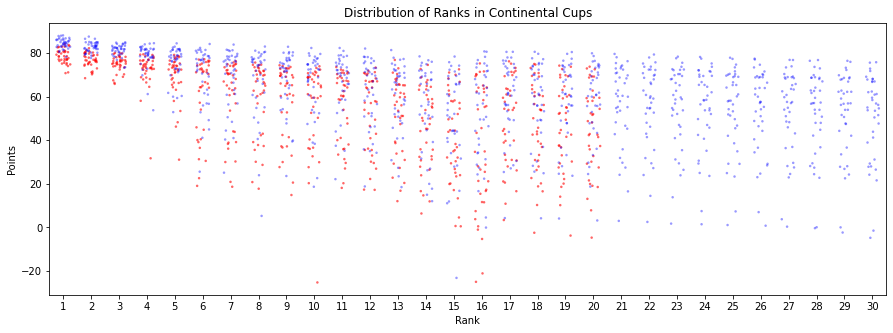

In [31]:
plt.figure(figsize = (15,5))
sns.stripplot(x="Finish_Rank", y="Score_Metric", data=tier2_df_W, jitter=0.25, size = 2.5, color = "red", alpha = 0.6)
sns.stripplot(x="Finish_Rank", y="Score_Metric", data=tier2_df_M, jitter=0.25, size = 2.5, color = "blue", alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in Continental Cups")
plt.show()


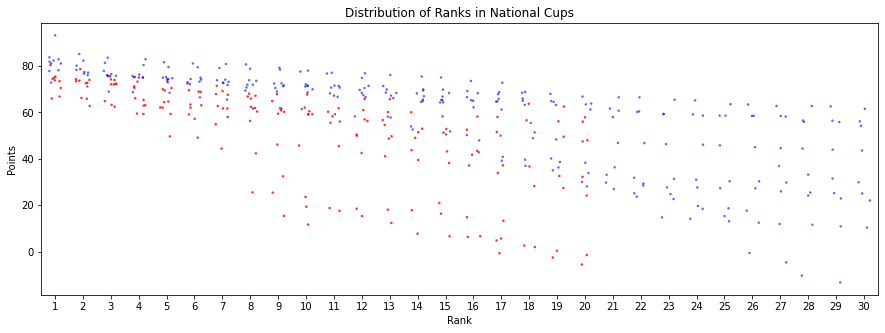

In [30]:
plt.figure(figsize = (15,5))
sns.stripplot(x="Finish_Rank", y="Score_Metric", data=tier3_df_W, jitter=0.25, size = 2.5, color = "red", alpha = 0.8)
sns.stripplot(x="Finish_Rank", y="Score_Metric", data=tier3_df_M, jitter=0.25, size = 2.5, color = "blue", alpha = 0.6)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in National Cups")
plt.show()

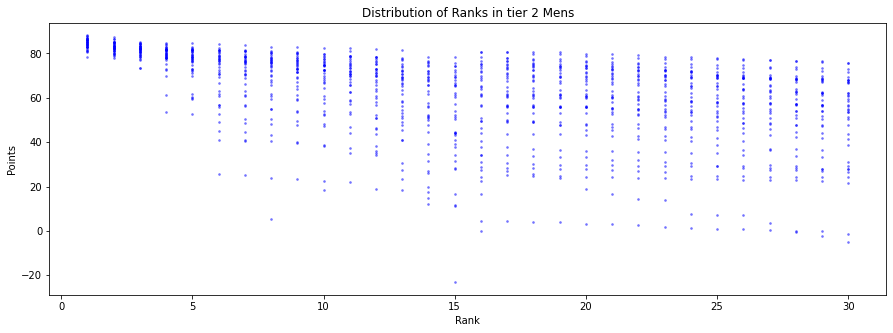

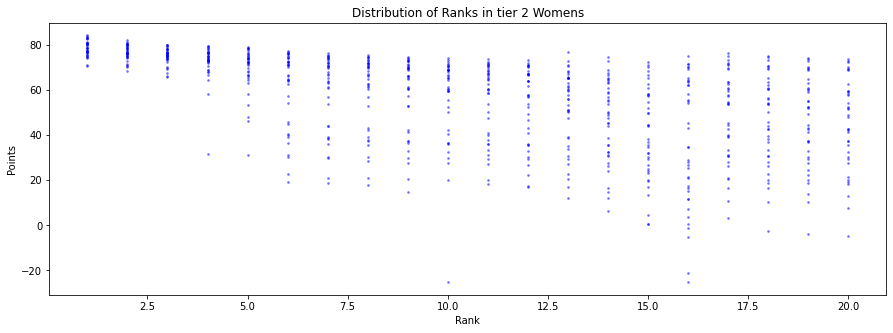

In [5]:
plt.figure(figsize = (15,5))
plt.scatter(tier2_df_M['Finish_Rank'], tier2_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier2_df_W['Finish_Rank'], tier2_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Womens")
plt.show()

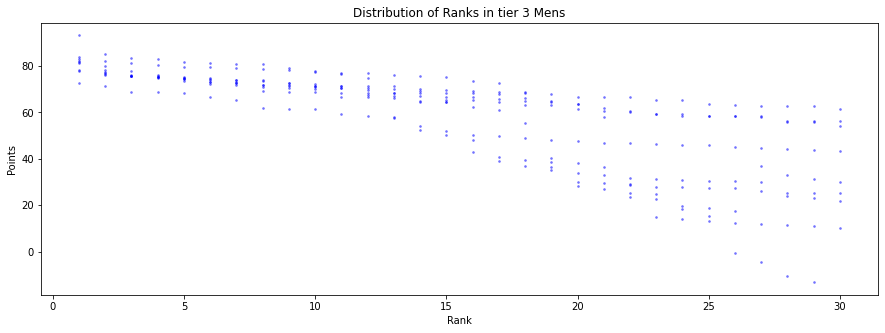

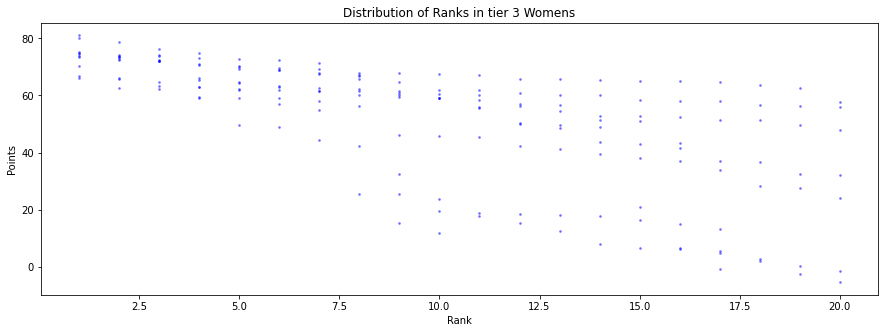

In [6]:
plt.figure(figsize = (15,5))
plt.scatter(tier3_df_M['Finish_Rank'], tier3_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 3 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier3_df_W['Finish_Rank'], tier3_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 3 Womens")
plt.show()

In [57]:
# rank = 1
# tier1_mean = tier1_df_M[tier1_df_M['Finish_Rank'] == rank].loc[:, 'Score_Metric'].mean()
# tier1_std = tier1_df_M[tier1_df_M['Finish_Rank'] == rank].loc[:, 'Score_Metric'].std()
# print(tier1_mean)
# print(tier1_std)
# tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric']

In [63]:
norm.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric'],
         loc = tier1_mean,
         scale = tier1_std)

array([0.62082146, 0.81114308, 0.75077986, 0.52449334, 0.45801424,
       0.22879104, 0.39690463, 0.90095046, 0.16199218, 0.92586251,
       0.68437997, 0.59242116, 0.98061569, 0.60826953, 0.53320112,
       0.33923154, 0.57534851, 0.23547035, 0.1354051 ])

In [64]:
poisson.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric'],
             mu = tier1_mean)

array([0.55727163, 0.63962924, 0.59907861, 0.51465366, 0.47170266,
       0.38678146, 0.47170266, 0.71542125, 0.34578431, 0.71542125,
       0.59907861, 0.55727163, 0.78217888, 0.55727163, 0.51465366,
       0.42891357, 0.55727163, 0.38678146, 0.34578431])

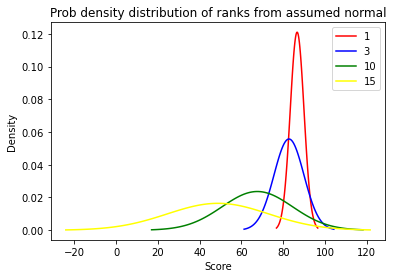

In [32]:
# Plotting cdf for Normal dist
rank = [1,3,10,15]
c = ["red", "blue", "green", "yellow"]

for i, j in zip(rank, c):
    quant_95 =  tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].quantile(0.95)
    tier1_mean = tier1_df_M[(tier1_df_M['Finish_Rank'] == i) & 
                            (tier1_df_M['Score_Metric'] <= quant_95)].loc[:, 'Score_Metric'].mean()
    tier1_std = tier1_df_M[(tier1_df_M['Finish_Rank'] == i) & 
                            (tier1_df_M['Score_Metric'] <= quant_95)].loc[:, 'Score_Metric'].std()

    x = np.linspace(tier1_mean - 3*tier1_std, tier1_mean + 3*tier1_std, 100)
    plt.plot(x, norm.pdf(x, tier1_mean, tier1_std), c = j)
    plt.title("Prob density distribution of ranks from assumed normal")
    plt.xlabel("Score")
    plt.ylabel("Density")

plt.legend(("1", "3", "10", "15"))
plt.show()

In [58]:
# Plotting cdf for Poisson dist
# rank = [1,3,10,15]
# c = ["red", "blue", "green", "yellow"]

# for i, j in zip(rank, c):
#     tier1_mean = tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].mean()
#     tier1_std = tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].std()

#     x = np.linspace(20, 100, 100)
#     plt.plot(x, poisson.cdf(x, mu = tier1_mean), c = j)
    
# plt.show()

## Next steps

Old:
- Divide ranks based on Cov >= 0.1 and < 0.1 for each tier
- Use Normal for Cov >= 0.1 and Poisson for < 0.1
- Get percentile / z-score for each rank distribution from 1-15
- Divide the z-score / 0.5 to get the multiplier for a rank for a competition
- Use the rank-15 multiplier as the multiplier for lower ranks

New
- Use Normal dist removing outliers 5-95 percentile values.
- Get percentile / z-score for each rank distribution from 1-30 Men 1-20 Women
- Divide the z-score / 0.5 to get the multiplier for a rank for a competition
- Use the same method for all ranks to get updated scores across competitions multiplyting the score with multiplier computed above


In [61]:
get_mean_sd(tier1_df_M, 5)

(80.99320610687023, 4.992386610832916)

In [97]:

temp= tier1_df_M.loc[tier1_df_M['Finish_Rank'].isin([1,10]), :]

temp = temp.reindex(columns = list(temp.columns)+['mean', 'stddev', 'zscore', 'Score_Multiplier'])

temp.loc[temp['Finish_Rank']==1, ['mean', 'stddev']]= get_mean_sd(tier1_df_M, 1)
temp.loc[temp['Finish_Rank']==10, ['mean', 'stddev']]= get_mean_sd(tier1_df_M, 10)

temp.loc[temp['Finish_Rank']==1, ['zscore']]= list(map(lambda z, mean, sigma: norm.cdf(z, mean, sigma), 
                                                  temp.loc[temp['Finish_Rank']==1, ['Score_Metric']].values, 
                                                  temp.loc[temp['Finish_Rank']==1, ['mean']].values, 
                                                  temp.loc[temp['Finish_Rank']==1, ['stddev']].values))

temp.loc[temp['Finish_Rank']==10, ['zscore']]= list(map(lambda z, mean, sigma: norm.cdf(z, mean, sigma), 
                                                  temp.loc[temp['Finish_Rank']==1, ['Score_Metric']].values, 
                                                  temp.loc[temp['Finish_Rank']==1, ['mean']].values, 
                                                  temp.loc[temp['Finish_Rank']==1, ['stddev']].values))

temp.loc[temp['Finish_Rank']==1, ['Score_Multiplier']] = list(map(lambda x: x/0.5, 
                                                                  temp.loc[temp['Finish_Rank']==1, ['zscore']].values))

temp.loc[temp['Finish_Rank']==10, ['Score_Multiplier']] = list(map(lambda x: x/0.5, 
                                                                  temp.loc[temp['Finish_Rank']==10, ['zscore']].values))

temp[temp['Finish_Rank'] == 10].head(50)

,Athlete_Comp_ID,Score_Metric,Finish_Rank,Gender,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,Judge_5_Score,Judge_6_Score_1,...,Round_Group,Season,Season_Comp,Round,Wind,Athlete_name,mean,stddev,zscore,Score_Multiplier
9,MUSTONEN Sami - FIN - Olympics - 2002 - Final 1,86.93,10,Men,4.4,4.5,4.5,4.5,4.5,6.28,...,Finals,2002,2002-Olympics,Final 1,2.0,MUSTONEN Sami - FIN,70.719618,13.218052,0.977837,1.955674
39,LASSILA Lauri - FIN - World Cup 10 - 2003 - Fi...,80.10,10,Men,4.3,4.3,4.4,4.2,4.3,5.36,...,Finals,2003,2003-World Cup 10,Final 1,5.0,LASSILA Lauri - FIN,70.719618,13.218052,0.592490,1.184980
69,COLAS Guilbaut - FRA - World Cup 8 - 2003 - Fi...,77.70,10,Men,4.3,3.8,4.0,4.0,4.3,5.67,...,Finals,2003,2003-World Cup 8,Final 1,1.0,COLAS Guilbaut - FRA,70.719618,13.218052,0.836819,1.673638
89,ROCHON Stephane - CAN - World Cup 5 - 2003 - F...,79.37,10,Men,3.7,4.0,3.8,3.8,3.8,5.69,...,Finals,2003,2003-World Cup 5,Final 1,3.4,ROCHON Stephane - CAN,70.719618,13.218052,0.816822,1.633644
119,LUUSUA Tapio - FIN - World Cup 6 - 2003 - Final 1,80.77,10,Men,3.7,4.4,4.0,3.7,4.3,5.83,...,Finals,2003,2003-World Cup 6,Final 1,1.0,LUUSUA Tapio - FIN,70.719618,13.218052,0.750374,1.500748
149,NIOL Laurent - FRA - World Cup 4 - 2003 - Final 1,81.77,10,Men,4.6,4.5,4.5,4.7,4.6,4.68,...,Finals,2003,2003-World Cup 4,Final 1,2.0,NIOL Laurent - FRA,70.719618,13.218052,0.901000,1.802000
179,FRIEDBERG Mike - USA - World Cup 7 - 2003 - Fi...,85.87,10,Men,4.6,4.6,4.6,4.7,4.5,5.41,...,Finals,2003,2003-World Cup 7,Final 1,0.0,FRIEDBERG Mike - USA,70.719618,13.218052,0.965676,1.931351
209,SAVOLAINEN Jari - FIN - World Cup 2 - 2003 - F...,85.53,10,Men,4.6,4.6,4.4,4.6,4.4,6.12,...,Finals,2003,2003-World Cup 2,Final 1,0.0,SAVOLAINEN Jari - FIN,70.719618,13.218052,0.937646,1.875292
239,JOHNSON Brady - USA - World Cup 1 - 2003 - Fin...,84.80,10,Men,4.3,4.4,4.6,4.5,4.1,6.11,...,Finals,2003,2003-World Cup 1,Final 1,NaN,JOHNSON Brady - USA,70.719618,13.218052,0.955921,1.911843
269,COSTA Adrian - AUS - World Championships - 200...,85.33,10,Men,4.6,4.7,4.7,4.7,4.6,6.33,...,Finals,2003,2003-World Championships,Final,1.0,COSTA Adrian - AUS,70.719618,13.218052,0.984100,1.968200


In [6]:
def get_mean_sd(data, rank):
    
    scores = data[data['Finish_Rank']==rank]['Score_Metric'].values
    # removing outliers
    lb = np.percentile(scores, 5)
    ub = np.percentile(scores, 99)
    
    scores = scores[(scores>lb) & (scores<ub)]
    
    return np.mean(scores), np.std(scores)

In [7]:
#computing the multiplier based on ranks

def get_multiplier(data):
    
    max_rank = data['Finish_Rank'].max()
   
    output_df = data.copy()
        
    output_df = output_df.reindex(columns = list(data.columns)+['mean','stddev','zscore','Score_Multiplier','Adjusted_score'])

    for rank in range(1, max_rank+1):
        
        # getting the mean and std dev for each rank
        output_df.loc[output_df['Finish_Rank']==rank, ['mean', 'stddev']]= get_mean_sd(tier1_df_M, rank)
    
        # computing the zscore corresponding to a normal distribution
        output_df.loc[output_df['Finish_Rank']==rank, ['zscore']] = list(map(lambda z, mean, sigma: norm.cdf(z, mean, sigma), 
                                                                              output_df.loc[output_df['Finish_Rank']==rank,['Score_Metric']].values, 
                                                                              output_df.loc[output_df['Finish_Rank']==rank,['mean']].values, 
                                                                              output_df.loc[output_df['Finish_Rank']==rank,['stddev']].values))
        
        # computing the Score multiplier as double of zscore
        output_df.loc[output_df['Finish_Rank']==rank, ['Score_Multiplier']] = list(map(lambda x: x/0.5, 
                                                                                      output_df.loc[output_df['Finish_Rank']==rank,['zscore']].values))
        
    # computing the Adjusted score
    output_df.loc[:, ['Adjusted_score']] = list(map(lambda x, y : x*y, 
                                                    output_df.loc[:,['Score_Metric']].values,
                                                    output_df.loc[:,['Score_Multiplier']].values))
            
    return output_df

In [8]:
updated_tier1_df_M = get_multiplier(tier1_df_M).loc[:, ['Athlete_Comp_ID','Athlete_name','Score_Metric','Finish_Rank','mean','stddev','Score_Multiplier','Adjusted_score','Season','Season_Comp','Round']]
updated_tier1_df_M['tier'] = 1

updated_tier2_df_M = get_multiplier(tier2_df_M).loc[:, ['Athlete_Comp_ID','Athlete_name','Score_Metric','Finish_Rank','mean','stddev','Score_Multiplier','Adjusted_score','Season','Season_Comp','Round']]
updated_tier2_df_M['tier'] = 2

updated_tier3_df_M = get_multiplier(tier3_df_M).loc[:, ['Athlete_Comp_ID','Athlete_name','Score_Metric','Finish_Rank','mean','stddev','Score_Multiplier','Adjusted_score','Season','Season_Comp','Round']]
updated_tier3_df_M['tier'] = 3

all_tier_df_M = pd.concat([updated_tier1_df_M, updated_tier2_df_M, updated_tier3_df_M], ignore_index = True, axis=0)

In [9]:
updated_tier1_df_W = get_multiplier(tier1_df_W).loc[:, ['Athlete_Comp_ID','Athlete_name','Score_Metric','Finish_Rank','mean','stddev','Score_Multiplier','Adjusted_score','Season','Season_Comp','Round']]
updated_tier1_df_W['tier'] = 1

updated_tier2_df_W = get_multiplier(tier2_df_W).loc[:, ['Athlete_Comp_ID','Athlete_name','Score_Metric','Finish_Rank','mean','stddev','Score_Multiplier','Adjusted_score','Season','Season_Comp','Round']]
updated_tier2_df_W['tier'] = 2

updated_tier3_df_W = get_multiplier(tier3_df_W).loc[:, ['Athlete_Comp_ID','Athlete_name','Score_Metric','Finish_Rank','mean','stddev','Score_Multiplier','Adjusted_score','Season','Season_Comp','Round']]
updated_tier3_df_W['tier'] = 3

all_tier_df_W = pd.concat([updated_tier1_df_W, updated_tier2_df_W, updated_tier3_df_W], ignore_index = True, axis=0)

In [10]:
all_tier_df_W.tail()

,Athlete_Comp_ID,Athlete_name,Score_Metric,Finish_Rank,mean,stddev,Score_Multiplier,Adjusted_score,Season,Season_Comp,Round,tier
3707,LE BRASSARD Noemie - CAN - Canada Cup 1 - 2019...,LE BRASSARD Noemie - CAN,41.08,13,62.163538,16.428678,0.199374,8.190278,2019,2019-Canada Cup 1,Qualification 2,3
3708,HURRY Kiera - CAN - Canada Cup 1 - 2019 - Qual...,HURRY Kiera - CAN,39.48,14,57.873385,18.230520,0.313006,12.357496,2019,2019-Canada Cup 1,Qualification 2,3
3709,GHERT Talya - CAN - Canada Cup 1 - 2019 - Qual...,GHERT Talya - CAN,38.12,15,52.952308,21.118393,0.482467,18.391630,2019,2019-Canada Cup 1,Qualification 2,3
3710,STODDART Clare - CAN - Canada Cup 1 - 2019 - Q...,STODDART Clare - CAN,37.11,16,50.240620,21.609624,0.543434,20.166836,2019,2019-Canada Cup 1,Qualification 2,3
3711,LAROCHE Florence - CAN - Canada Cup 1 - 2019 -...,LAROCHE Florence - CAN,4.79,17,52.457344,20.235504,0.018491,0.088574,2019,2019-Canada Cup 1,Qualification 1,3


In [11]:
#computing the competition scores based on score multiplier of top 5 from each competition

def get_level_adj_factor(data):
    
    years = data['Season'].unique()
    
    output_df = data.copy()
        
    output_df = output_df.reindex(columns = list(data.columns)+['level_adj_factor'])
    
    multi_level_players_df = pd.DataFrame()
    
    for year in years:
        
        # all players in a year
        each_yr_df = output_df.loc[output_df['Season']==year, :]
        
        #taking the average score adjustments of top 5 ranks
        tier_counts = each_yr_df.groupby('Athlete_name').tier.nunique()
        tier_counts = tier_counts[tier_counts > 1]
        
        if not tier_counts.empty:
            multi_level_players_each_yr = output_df.loc[output_df['Athlete_name'].isin(list(tier_counts.index)) & (output_df['Season'] == year), 
                                                     ['Athlete_name', 'Adjusted_score', 'Season', 'tier']]
            multi_level_players_df = pd.concat([multi_level_players_df, multi_level_players_each_yr], ignore_index=True, axis=0) 
    
#     multi_level_players_df = multi_level_players_df.pivot_table(index = ['Athlete_name', 'Season'],
#                                                                 columns = 'tier',
#                                                                 values = 'Adjusted_score')
    multi_level_players_df.columns.name = None
    multi_level_players_df.columns = multi_level_players_df.columns.astype(str)
    
#     multi_level_players_df['diff_tier_1_2'] = list(map(lambda x, y: x-y, multi_level_players_df['1'], multi_level_players_df['2']))
#     multi_level_players_df['diff_tier_2_3'] = list(map(lambda x, y: x-y, multi_level_players_df['2'], multi_level_players_df['3']))
    
#     multi_level_players_df = multi_level_players_df.reset_index()
    
    return multi_level_players_df

In [12]:
temp_m = get_level_adj_factor(all_tier_df_M)
temp_w = get_level_adj_factor(all_tier_df_W)

temp_w.columns

Index(['Athlete_name', 'Adjusted_score', 'Season', 'tier'], dtype='object')

In [24]:
temp.head()

,Athlete_name,Adjusted_score,Season,tier
0,COTA Jeremy - USA,107.983768,2010,1
1,DIGRAVIO David - USA,113.135247,2010,1
2,DISCOE Jimmy - USA,11.890073,2010,1
3,MARQUIS Philippe - CAN,106.418499,2010,1
4,ROCHON Cedric - CAN,106.396707,2010,1


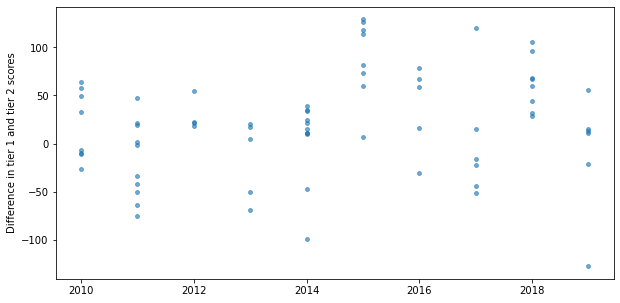

In [13]:
plt.figure(figsize = (10,5))
plt.scatter(temp['Season'], temp['diff_tier_1_2'], alpha = 0.6, s = 15)
plt.ylabel("Difference in tier 1 and tier 2 scores")
plt.show()

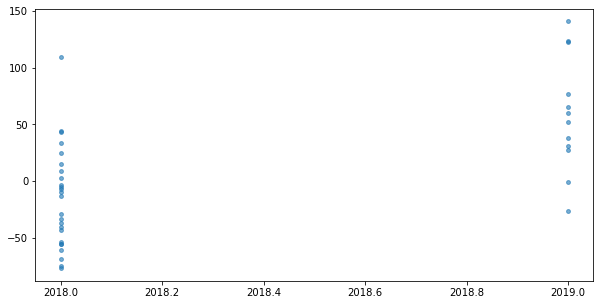

In [84]:
plt.figure(figsize = (10,5))
plt.scatter(temp['Season'], temp['diff_tier_2_3'], alpha = 0.6, s = 15)
plt.show()

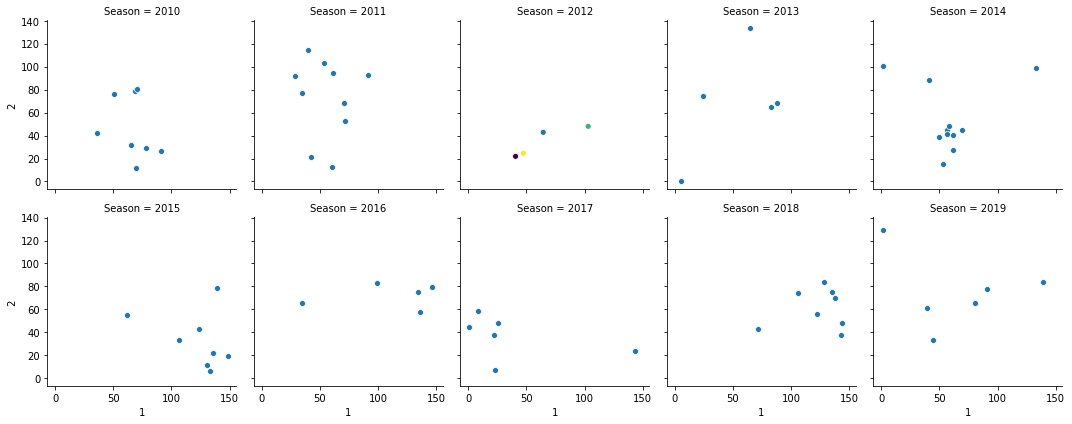

In [100]:
g = sns.FacetGrid(temp, col="Season", height=3, col_wrap=5)
g.map(sns.scatterplot, "1", "2")

In [17]:
# temp = temp.rename(columns = {'1': 'tier_1','2': 'tier_2','3': 'tier_3'})

In [27]:
# temp_1_2 = temp[(temp['tier_1'].notnull()) & (temp['tier_2'].notnull())] 
temp.shape

(494, 4)

In [25]:
import statsmodels.formula.api as smf

In [137]:
data_t1 = all_tier_df_M.loc[(all_tier_df_M['tier'] == 1), ['Season', 'Adjusted_score']]

data_t1 = data_t1.rename(columns = {'Adjusted_score': 'tier_1'})


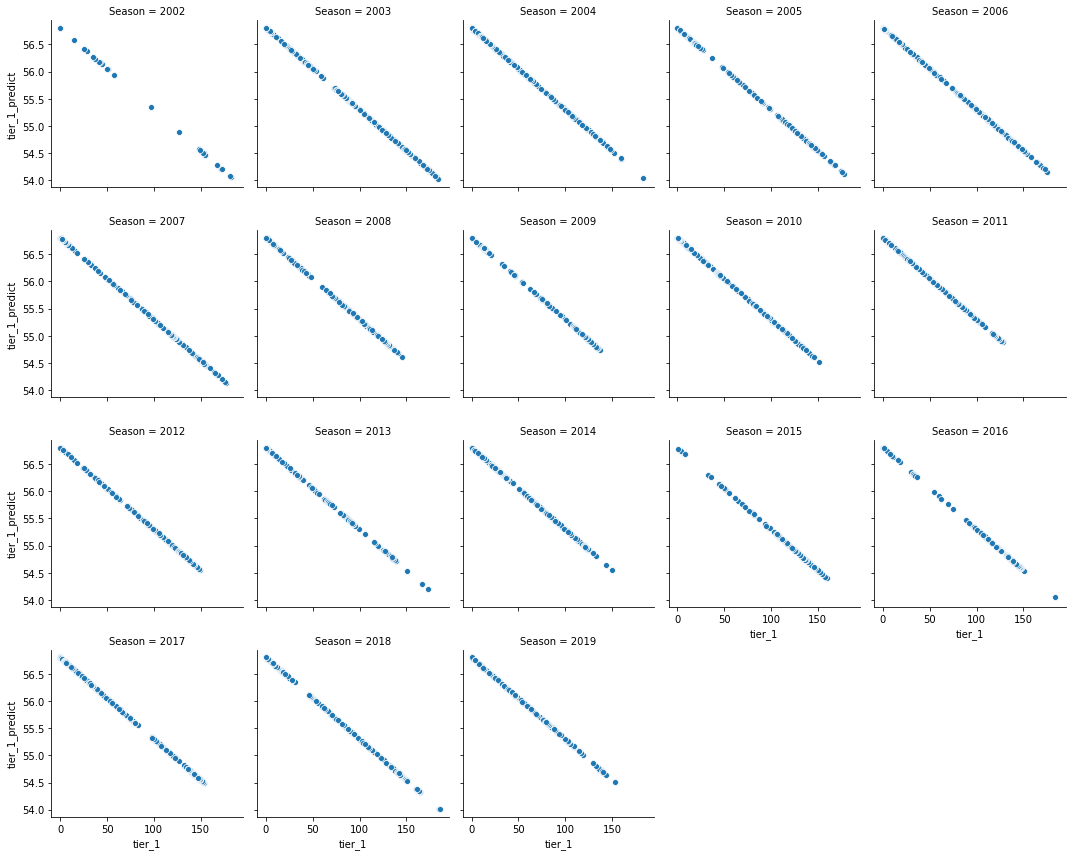

In [138]:
data_t1['tier_1_predict'] = mdf.predict(data_t1)

g = sns.FacetGrid(data_t1, col="Season", height=3, col_wrap=5)
g.map(sns.scatterplot, "tier_1", "tier_1_predict")

In [12]:
all_tier_df_M.to_csv("../data/all_tiers_adjusted_scores_men.csv", index = False)
all_tier_df_W.to_csv("../data/all_tiers_adjusted_scores_women.csv", index = False)


In [13]:

temp_m.to_csv("../data/temp_file_for_level_adj_men.csv", index = False)
temp_w.to_csv("../data/temp_file_for_level_adj_women.csv", index = False)

In [14]:
temp_m.shape

(494, 4)

In [15]:
temp_w.shape

(354, 4)